## Import all necessary liabraries

In [32]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
import seaborn as sn

### Making some Data Visualization

In [33]:
BATCH_SIZE = 32 
IMG_SIZE = 224

In [34]:
# Get Training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(r"Train Dataset",
    seed= 42,
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 1140 files belonging to 3 classes.


In [35]:
# Find classnames of training dataset
class_names = train_dataset.class_names
class_names

['0', '1', '2']

In [36]:
# Get the shape of training dataset
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[1 1 2 0 2 0 1 0 0 0 1 0 1 0 2 2 2 2 0 1 1 1 0 2 0 1 0 1 0 1 1 1]


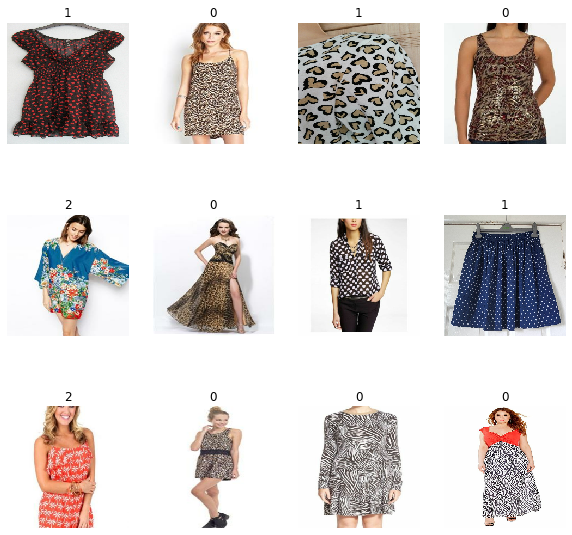

In [37]:
# Look into images of training dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## Data Preprocessing

In [38]:
img_train = []
label_train = []
img_path = 'Train Dataset'

for directory in os.listdir(img_path):
    for file in os.listdir(os.path.join(img_path, directory)):
        
        image_path = os.path.join(img_path, directory, file)
        image = np.array(Image.open(image_path))
        image = cv2.imread(image_path)
        image = np.array(cv2.resize(image,(45,45)))
        image = image / 255
        image = image.astype('float32')
        img_train.append(image)
        dir_int = int(directory)
        label_train.append(dir_int)

img_arr_train = np.array(img_train)
label_arr_train = np.array(label_train)

In [39]:
print(len(img_arr_train))
print(label_arr_train)

1140
[0 0 0 ... 2 2 2]


In [40]:
print(img_arr_train[0].dtype)
print(img_arr_train[0][:2])

float32
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.   

0


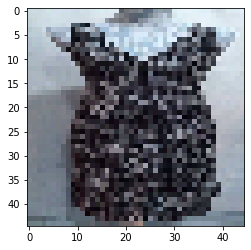

In [41]:
plt.imshow(img_arr_train[20])
print(label_arr_train[20])

0


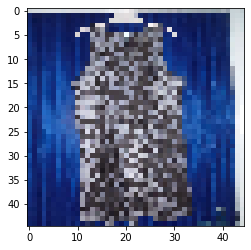

In [42]:
plt.imshow(img_arr_train[35])
print(label_arr_train[35])

In [43]:
print(img_arr_train.shape)

(1140, 45, 45, 3)


In [44]:
img_test = []
label_test = []
img_path = 'Test Dataset'

for directory in os.listdir(img_path):
    for file in os.listdir(os.path.join(img_path, directory)):
        
        image_path = os.path.join(img_path, directory, file)
        image = np.array(Image.open(image_path))
        image = cv2.imread(image_path)
        image = np.array(cv2.resize(image,(45,45)))
        image = image / 255
        image = image.astype('float32')
        img_test.append(image)
        dir_int = int(directory)
        label_test.append(dir_int)

img_arr_test = np.array(img_test)
label_arr_test = np.array(label_test)

In [45]:
print(len(img_arr_train))
print(len(label_arr_train))
print(len(img_arr_test))
print(len(label_arr_test))

1140
1140
300
300


In [46]:
print(img_arr_train.shape)
print(img_arr_test.shape)

img_arr_train_f = img_arr_train.reshape(len(img_arr_train), 45*45*3)
img_arr_test_f = img_arr_test.reshape(len(img_arr_test), 45*45*3)

print(img_arr_train_f.shape)
print(img_arr_test_f.shape)

(1140, 45, 45, 3)
(300, 45, 45, 3)
(1140, 6075)
(300, 6075)


In [47]:
np.savetxt('train.csv', img_arr_train_f)
np.savetxt('trainLabel.csv', label_arr_train, fmt='%i')
np.savetxt('test.csv', img_arr_test_f)
np.savetxt('testLabel.csv', label_arr_test, fmt='%i')

In [48]:
Train = np.loadtxt('train.csv')
TrainLabels = np.loadtxt('trainLabel.csv').astype(int)
Test = np.loadtxt('test.csv')
TestLabels = np.loadtxt('testLabel.csv').astype(int)

np.random.seed(0)
np.random.shuffle(Train)
np.random.seed(0)
np.random.shuffle(TrainLabels)
np.random.seed(0)
np.random.shuffle(Test)
np.random.seed(0)
np.random.shuffle(TestLabels)

In [90]:
Model_1 = keras.Sequential()
Model_1.add(keras.Input(shape=(6075,)))
Model_1.add(keras.layers.Dense(256, activation='relu')),
Model_1.add(keras.layers.Dense(3, activation='softmax'))

Model_1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

History_1 = Model_1.fit(Train, TrainLabels, validation_split=0.2, epochs=150)

Epoch 1/150
29/29 [==============================] - 1s 16ms/step - loss: 4.0317 - accuracy: 0.3684 - val_loss: 1.2681 - val_accuracy: 0.4825
Epoch 2/150
29/29 [==============================] - 0s 12ms/step - loss: 1.7888 - accuracy: 0.4605 - val_loss: 2.4387 - val_accuracy: 0.4561
Epoch 3/150
29/29 [==============================] - 0s 13ms/step - loss: 1.3837 - accuracy: 0.4890 - val_loss: 0.9561 - val_accuracy: 0.5702
Epoch 4/150
29/29 [==============================] - 0s 12ms/step - loss: 0.8949 - accuracy: 0.5768 - val_loss: 1.3455 - val_accuracy: 0.4342
Epoch 5/150
29/29 [==============================] - 0s 12ms/step - loss: 1.0158 - accuracy: 0.5800 - val_loss: 1.2059 - val_accuracy: 0.4254
Epoch 6/150
29/29 [==============================] - 0s 13ms/step - loss: 0.7928 - accuracy: 0.6338 - val_loss: 0.9574 - val_accuracy: 0.5351
Epoch 7/150
29/29 [==============================] - 0s 12ms/step - loss: 1.0196 - accuracy: 0.6020 - val_loss: 2.2160 - val_accuracy: 0.4956
Epoch 

29/29 [==============================] - 0s 12ms/step - loss: 0.3961 - accuracy: 0.8542 - val_loss: 1.4936 - val_accuracy: 0.5219
Epoch 59/150
29/29 [==============================] - 0s 12ms/step - loss: 0.2365 - accuracy: 0.9298 - val_loss: 1.1279 - val_accuracy: 0.6404
Epoch 60/150
29/29 [==============================] - 0s 12ms/step - loss: 0.2271 - accuracy: 0.9353 - val_loss: 1.4514 - val_accuracy: 0.5658
Epoch 61/150
29/29 [==============================] - 0s 12ms/step - loss: 0.2976 - accuracy: 0.8838 - val_loss: 1.2789 - val_accuracy: 0.5965
Epoch 62/150
29/29 [==============================] - 0s 12ms/step - loss: 0.2708 - accuracy: 0.9057 - val_loss: 1.3199 - val_accuracy: 0.5614
Epoch 63/150
29/29 [==============================] - 0s 14ms/step - loss: 0.3797 - accuracy: 0.8366 - val_loss: 1.2780 - val_accuracy: 0.5702
Epoch 64/150
29/29 [==============================] - 0s 12ms/step - loss: 0.3638 - accuracy: 0.8542 - val_loss: 1.1829 - val_accuracy: 0.5965
Epoch 65/150

29/29 [==============================] - 0s 12ms/step - loss: 0.3021 - accuracy: 0.8761 - val_loss: 1.3524 - val_accuracy: 0.6272
Epoch 116/150
29/29 [==============================] - 0s 12ms/step - loss: 0.1054 - accuracy: 0.9715 - val_loss: 1.2626 - val_accuracy: 0.6711
Epoch 117/150
29/29 [==============================] - 0s 12ms/step - loss: 0.0669 - accuracy: 0.9912 - val_loss: 1.3759 - val_accuracy: 0.6360
Epoch 118/150
29/29 [==============================] - 0s 12ms/step - loss: 0.0838 - accuracy: 0.9781 - val_loss: 1.5057 - val_accuracy: 0.6316
Epoch 119/150
29/29 [==============================] - 0s 12ms/step - loss: 0.0846 - accuracy: 0.9868 - val_loss: 1.3110 - val_accuracy: 0.6754
Epoch 120/150
29/29 [==============================] - 0s 12ms/step - loss: 0.0723 - accuracy: 0.9879 - val_loss: 1.4271 - val_accuracy: 0.6272
Epoch 121/150
29/29 [==============================] - 0s 12ms/step - loss: 0.0854 - accuracy: 0.9781 - val_loss: 1.7837 - val_accuracy: 0.5965
Epoch 

In [91]:
Model_1.evaluate(Test, TestLabels)

10/10 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.9467


[0.2586335837841034, 0.9466666579246521]

In [92]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

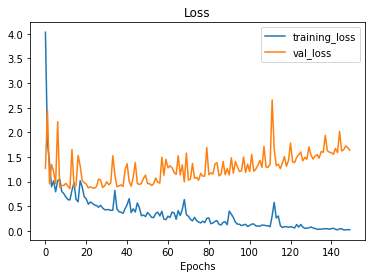

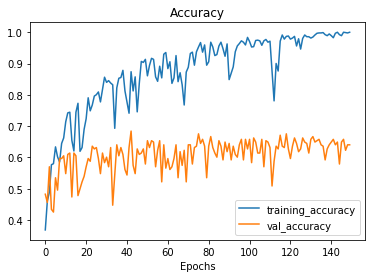

In [93]:
plot_loss_curves(History_1)

Our Model_1 is not performing we need to improve model

In [95]:
Model_2 = keras.Sequential()
Model_2.add(keras.Input(shape=(6075,))),
Model_2.add(keras.layers.Dense(512, activation='relu')),
Model_2.add(keras.layers.Dense(256, activation='relu')),
Model_2.add(keras.layers.Dense(3, activation='softmax'))

Model_2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

History_2 = Model_2.fit(Train, TrainLabels, validation_split=0.2, epochs=100)

Epoch 1/100
29/29 [==============================] - 1s 28ms/step - loss: 3.3119 - accuracy: 0.3399 - val_loss: 2.1213 - val_accuracy: 0.3728
Epoch 2/100
29/29 [==============================] - 1s 23ms/step - loss: 1.2719 - accuracy: 0.4572 - val_loss: 1.0388 - val_accuracy: 0.4737
Epoch 3/100
29/29 [==============================] - 1s 23ms/step - loss: 0.9981 - accuracy: 0.5066 - val_loss: 0.9395 - val_accuracy: 0.5570
Epoch 4/100
29/29 [==============================] - 1s 23ms/step - loss: 0.9085 - accuracy: 0.5724 - val_loss: 1.0927 - val_accuracy: 0.4518
Epoch 5/100
29/29 [==============================] - 1s 23ms/step - loss: 0.8996 - accuracy: 0.5779 - val_loss: 0.9049 - val_accuracy: 0.5219
Epoch 6/100
29/29 [==============================] - 1s 23ms/step - loss: 0.9220 - accuracy: 0.5559 - val_loss: 1.1093 - val_accuracy: 0.4781
Epoch 7/100
29/29 [==============================] - 1s 23ms/step - loss: 0.8378 - accuracy: 0.6096 - val_loss: 0.9681 - val_accuracy: 0.5482
Epoch 

29/29 [==============================] - 1s 22ms/step - loss: 0.3867 - accuracy: 0.8498 - val_loss: 1.4964 - val_accuracy: 0.5351
Epoch 59/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2867 - accuracy: 0.8882 - val_loss: 1.2045 - val_accuracy: 0.6404
Epoch 60/100
29/29 [==============================] - 1s 22ms/step - loss: 0.2330 - accuracy: 0.9156 - val_loss: 1.2992 - val_accuracy: 0.6360
Epoch 61/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2358 - accuracy: 0.9101 - val_loss: 1.1715 - val_accuracy: 0.6228
Epoch 62/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2936 - accuracy: 0.8805 - val_loss: 1.4359 - val_accuracy: 0.5702
Epoch 63/100
29/29 [==============================] - 1s 21ms/step - loss: 0.2280 - accuracy: 0.9145 - val_loss: 1.6359 - val_accuracy: 0.5351
Epoch 64/100
29/29 [==============================] - 1s 21ms/step - loss: 0.1603 - accuracy: 0.9452 - val_loss: 1.2806 - val_accuracy: 0.6228
Epoch 65/100

In [96]:
Model_2.evaluate(Test, TestLabels)

10/10 [==============================] - 0s 4ms/step - loss: 0.2706 - accuracy: 0.9300


[0.27056455612182617, 0.9300000071525574]

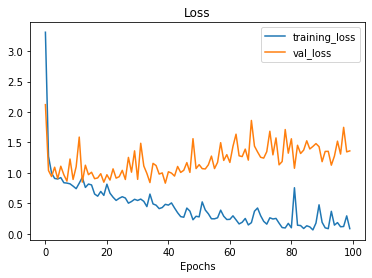

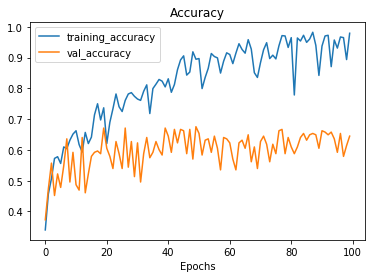

In [97]:
plot_loss_curves(History_2)

In [105]:
Model_3 = keras.Sequential()
Model_3.add(keras.Input(shape=(6075,))),
Model_3.add(keras.layers.Dense(512, activation='relu')),
Model_3.add(keras.layers.Dense(256, activation='relu')),
Model_3.add(keras.layers.Dense(128, activation='relu')),
Model_3.add(keras.layers.Dense(64, activation='relu')),
Model_3.add(keras.layers.Dense(3, activation='softmax'))

Model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

History_3 = Model_3.fit(Train, TrainLabels, validation_split=0.2, epochs=150)

C:\Users\Seema More\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 29ms/step - loss: 1.8306 - accuracy: 0.3706 - val_loss: 1.1444 - val_accuracy: 0.4123
Epoch 2/150
29/29 [==============================] - 1s 23ms/step - loss: 1.1050 - accuracy: 0.4408 - val_loss: 1.0262 - val_accuracy: 0.4430
Epoch 3/150
29/29 [==============================] - 1s 23ms/step - loss: 1.0670 - accuracy: 0.4649 - val_loss: 0.9532 - val_accuracy: 0.5439
Epoch 4/150
29/29 [==============================] - 1s 23ms/step - loss: 1.0929 - accuracy: 0.4704 - val_loss: 0.9394 - val_accuracy: 0.5746
Epoch 5/150
29/29 [==============================] - 1s 23ms/step - loss: 0.9449 - accuracy: 0.5318 - val_loss: 0.9830 - val_accuracy: 0.5000
Epoch 6/150
29/29 [==============================] - 1s 23ms/step - loss: 0.9127 - accuracy: 0.5669 - val_loss: 0.9067 - val_accuracy: 0.5833
Epoch 7/150
29/29 [==============================] - 1s 23ms/step - loss: 0.8598 - accuracy: 0.5855 - val_loss: 0.9572 - val_accuracy: 0.5263
Epoch 

29/29 [==============================] - 1s 22ms/step - loss: 0.3497 - accuracy: 0.8596 - val_loss: 1.0609 - val_accuracy: 0.6447
Epoch 59/150
29/29 [==============================] - 1s 22ms/step - loss: 0.2818 - accuracy: 0.8991 - val_loss: 2.2238 - val_accuracy: 0.5395
Epoch 60/150
29/29 [==============================] - 1s 22ms/step - loss: 0.5891 - accuracy: 0.7643 - val_loss: 0.9976 - val_accuracy: 0.6009
Epoch 61/150
29/29 [==============================] - 1s 22ms/step - loss: 0.3349 - accuracy: 0.8586 - val_loss: 0.9547 - val_accuracy: 0.6623
Epoch 62/150
29/29 [==============================] - 1s 22ms/step - loss: 0.2550 - accuracy: 0.9112 - val_loss: 1.1199 - val_accuracy: 0.6667
Epoch 63/150
29/29 [==============================] - 1s 22ms/step - loss: 0.2665 - accuracy: 0.8980 - val_loss: 1.0355 - val_accuracy: 0.6667
Epoch 64/150
29/29 [==============================] - 1s 22ms/step - loss: 0.3014 - accuracy: 0.8914 - val_loss: 2.1494 - val_accuracy: 0.4956
Epoch 65/150

Epoch 115/150
29/29 [==============================] - 1s 22ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 1.6332 - val_accuracy: 0.6711
Epoch 116/150
29/29 [==============================] - 1s 22ms/step - loss: 0.0955 - accuracy: 0.9649 - val_loss: 1.7256 - val_accuracy: 0.6404
Epoch 117/150
29/29 [==============================] - 1s 22ms/step - loss: 0.0565 - accuracy: 0.9770 - val_loss: 1.8933 - val_accuracy: 0.6579
Epoch 118/150
29/29 [==============================] - 1s 22ms/step - loss: 0.0342 - accuracy: 0.9923 - val_loss: 2.0295 - val_accuracy: 0.6272
Epoch 119/150
29/29 [==============================] - 1s 21ms/step - loss: 0.2214 - accuracy: 0.9276 - val_loss: 2.0246 - val_accuracy: 0.5219
Epoch 120/150
29/29 [==============================] - 1s 22ms/step - loss: 0.4822 - accuracy: 0.8202 - val_loss: 0.9885 - val_accuracy: 0.6447
Epoch 121/150
29/29 [==============================] - 1s 22ms/step - loss: 0.1567 - accuracy: 0.9397 - val_loss: 1.6023 - val_accuracy:

In [106]:
Model_3.evaluate(Test, TestLabels)

10/10 [==============================] - 0s 5ms/step - loss: 0.2986 - accuracy: 0.9333


[0.2986396253108978, 0.9333333373069763]

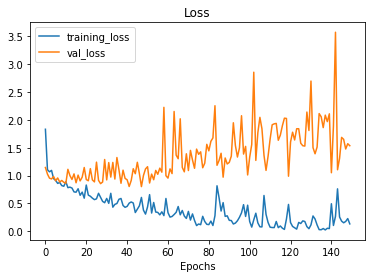

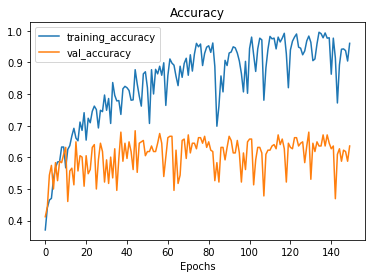

In [107]:
plot_loss_curves(History_3)

### Model 3 has better accuracy than other model So, will do prediction with model 3


In [108]:
#Do some predictions with our model 2
Preds = Model_3.predict(Test)
PredLabels = []
for arr in Preds:
    PredLabels.append(np.argmax(arr))
Final_Pred_Label = np.array(PredLabels)

In [109]:
print(Final_Pred_Label[:15])
print(TestLabels[:15])

[2 1 0 2 2 1 2 2 0 1 2 0 1 2 0]
[2 1 0 2 2 1 2 2 0 1 2 0 1 2 0]


### Classification Report

In [110]:
print(classification_report(TestLabels, Final_Pred_Label))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       100
           1       0.96      0.92      0.94       100
           2       0.91      0.96      0.93       100

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Text(33.0, 0.5, 'Truth')

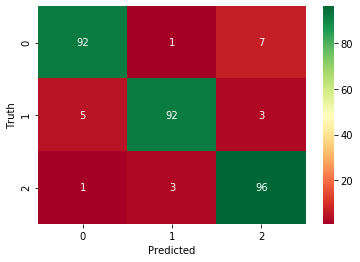

In [111]:
conf_mat = tf.math.confusion_matrix(labels=TestLabels, predictions=Final_Pred_Label)

sn.heatmap(conf_mat, annot=True, cmap='RdYlGn', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
# Summary of model_2
Model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 512)               3110912   
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 3)                 195       
                                                                 
Total params: 3,283,587
Trainable params: 3,283,587
Non-trainable params: 0
_________________________________________________________________
